# SNMP

### 📊 CloudWatch vs SNMP 비교표

| 항목 | **CloudWatch** | **SNMP (Simple Network Management Protocol)** |
| --- | --- | --- |
| **주요 사용 환경** | AWS 클라우드 전용 | 온프레미스 서버, 네트워크 장비 |
| **설정 대상** | AWS 리소스 (EC2, RDS, Lambda 등) | 스위치, 라우터, 서버, NAS 등 장비 |
| **데이터 수집 방식** | Agent 또는 API (Push 기반) | Agentless / polling & trap (Pull & Push 혼합) |
| **표준화** | AWS 독자 프로토콜 기반 (Cloud API) | IETF 표준 (RFC1157, RFC1901 등) |
| **보안 수준** | IAM 기반 인증/권한 제어 | SNMPv1/v2c는 낮음, v3는 인증+암호화 지원 |
| **주요 구성 요소** | Metric, Alarm, Dashboard, Log Group | Manager, Agent, MIB, OID |
| **알림 방식** | EventBridge, SNS, Alarm 등 연동 | SNMP Trap (비동기 알림) |
| **확장성** | 클라우드 스케일에 최적화 | 대규모 환경에선 관리 복잡 (MIB 관리 등) |
| **UI/대시보드** | AWS Console에서 시각화 가능 | 별도 툴(Zabbix, PRTG 등) 필요 |
| **기술 난이도** | 상대적으로 쉬움 (AWS IAM 개념만 익히면 됨) | OID, MIB 등 구조 학습 필요 |
| **실무 활용도 (DevOps)** | 매우 높음 | 간접적 활용 (Exporter 통해 Prometheus 연동 등) |
| **공무원 시험 출제** | ❌ 출제 X (AWS 사양이라 공시 비출제) | ✅ 출제 빈도 높음 (응용계층 프로토콜) |

---

### 🧠 결론 요약

- **CloudWatch**는 AWS에서 기본 제공하는 **클라우드 네이티브 모니터링 도구**로, **DevOps에 매우 친숙**합니다.
- **SNMP**는 **전산직/공공기관/온프레미스 장비 운영에 핵심적인 기술**로, **공무원 시험 및 전통적인 전산실 실무에서 자주 등장**합니다.

---

## 📌 1. **CloudWatch vs SNMP 시각적 비교 도식**

```

        ┌─────────────────────┐                      ┌──────────────────────┐
        │   AWS CloudWatch    │                      │         SNMP         │
        └─────────────────────┘                      └──────────────────────┘
                 │                                            │
        ┌────────▼────────┐                        ┌─────────▼─────────┐
        │ Cloud Agent /   │                        │ SNMP Agent (장비 내)│
        │ Cloud API       │                        │ ex. Cisco, HP 등   │
        └────────┬────────┘                        └─────────┬─────────┘
                 │                                            │
        ┌────────▼────────┐                        ┌─────────▼─────────┐
        │ CloudWatch Logs │                        │ SNMP Manager      │
        │ CloudWatch Metrics                      │ ex. Zabbix, PRTG  │
        └────────┬────────┘                        └─────────┬─────────┘
                 │                                            │
        ┌────────▼────────┐                        ┌─────────▼─────────┐
        │ CloudWatch      │                        │ MIB / OID 기반     │
        │ Dashboard &     │                        │ 정보 해석 및 알림  │
        │ Alarm 설정       │                        │ SNMP Trap 처리     │
        └─────────────────┘                        └────────────────────┘

```

---

## 🛠️ 2. **실제 구성도 예시**

### ✅ [A] CloudWatch 기반 AWS 모니터링 구성도

```

       [ EC2 / Lambda / RDS / EKS ]
                    │
      ┌─────────────▼─────────────┐
      │     CloudWatch Agent      │  ← EC2의 경우 설치 필요
      └─────────────┬─────────────┘
                    ▼
        ┌──────────────────────────┐
        │  CloudWatch Metrics      │
        │  CloudWatch Logs         │
        └──────┬─────────┬─────────┘
               ▼         ▼
      [ Dashboard ]   [ Alarm → SNS → Slack, Email ]

```

---

### ✅ [B] SNMP 기반 온프레미스 모니터링 구성도

```

    [ Cisco Switch / HP Server / UPS 장비 ]
                    │
         ┌──────────▼──────────┐
         │   SNMP Agent 탑재    │ ← 설정: Community, OID, v2/v3
         └──────────┬──────────┘
                    ▼
            [ SNMP Manager ]
    (Zabbix, PRTG, SolarWinds 등)
                    │
          ┌─────────▼─────────┐
          │   상태 모니터링    │ ← Polling or Trap 기반
          │   대시보드 표시    │
          └────────────────────┘

```

---

## 🧠 정리 요약

| 구분 | CloudWatch | SNMP |
| --- | --- | --- |
| 대상 | AWS 클라우드 리소스 | 물리 장비 (서버, 스위치 등) |
| 구성도 요소 | Agent, CloudWatch, SNS 등 | Agent, Manager, MIB, Trap 등 |
| 실무 사용 | DevOps, 클라우드 운영자 | 전산실, 네트워크 관리자 |

---

## Q. SNMP에 대한 설명으로 옳지 않은 것은?

1) 관리자는 GetRequest  와 같은 메시지를 에이전트에 보내서 에이전트의 정보를 요구한다.
2) 에이전트는 비정상적인 상황을 관리자에게 경고하기 위하여 Trap 메시지를 관리자에게 보냄으로써 관리 과정에 기여할 수 있다.
3) TCP/TP 프로토콜을 사용하는 인터넷에서 장치를 관리하기 위한 것으로, UDP포트 161번과 162번을 사용한다.
4) MIB는 객체의 이름을 붙이고 객체의 유형을 정의하며, 객체와 값을 부호화하는 등의 일반적인 규칙을 사용한다.


---

## ✅ MIB 관련 공무원 시험 보기 정리

### 📘 1. MIB의 역할 (출제 포인트)

| 보기 내용 | 정답 여부 | 해설 |
| --- | --- | --- |
| MIB는 관리되는 객체의 이름과 형식을 정의한다. | ✅ 맞는 보기 | 객체(OID)의 이름, 데이터 타입, 접근 권한 등을 정의함 |
| MIB는 SNMP 메시지 전송을 위한 객체 부호화 방식을 정의한다. | ❌ 틀린 보기 | 부호화는 **ASN.1 + BER** 규칙으로 처리됨 |
| MIB는 SNMP 에이전트와 관리자 사이에서 데이터를 교환하는 프로토콜이다. | ❌ 틀린 보기 | MIB는 **데이터 명세**, 프로토콜은 SNMP |
| MIB는 SNMP 관리에 필요한 모든 장비의 구성 파일이다. | ❌ 틀린 보기 | 구성 파일이라기보다 **데이터 정의 모음** |
| MIB는 관리 객체를 계층적으로 구조화한 데이터베이스이다. | ✅ 맞는 보기 | 트리 구조(OID)로 표현됨 |

---

### 📗 2. MIB + OID 관련 보기

| 보기 내용 | 정답 여부 | 해설 |
| --- | --- | --- |
| OID는 MIB 트리 상에서 각 객체를 고유하게 식별한다. | ✅ 맞는 보기 | 예: `1.3.6.1.2.1.1.1`은 system.description |
| MIB는 각 객체에 대해 고유 식별자인 OID를 부여한다. | ✅ 맞는 보기 | 맞음 |
| OID는 에이전트에서만 사용되고 관리자는 이를 참조하지 않는다. | ❌ 틀린 보기 | 관리자가 **GetRequest 시 직접 지정** |

---

### 🛑 3. MIB와 Trap 메시지 관련 보기 (자주 섞여 나옴)

| 보기 내용 | 정답 여부 | 해설 |
| --- | --- | --- |
| SNMP Trap은 MIB에 정의된 특정 이벤트를 기반으로 전송된다. | ✅ 맞는 보기 | ex. 링크 다운, 팬 속도 이상 등 이벤트 OID가 있음 |
| MIB는 Trap 메시지를 수신하는 포트를 정의한다. | ❌ 틀린 보기 | 포트 정의는 SNMP 프로토콜 레벨 (162/UDP) |
| SNMP Trap은 MIB 없이도 해석 가능하다. | ❌ 틀린 보기 | OID 해석에 MIB 필요함 (없으면 숫자만 나옴) |

---

### 💡 자주 출제되는 포인트 요약

| 출제 포인트 | 정답 방향 |
| --- | --- |
| MIB는 데이터 사전 | ✅ 이름/형식/권한 정의, 객체 정의용 |
| MIB는 부호화 기능 있음? | ❌ 없음 (ASN.1/BER가 담당) |
| MIB는 트리 구조? | ✅ OID 계층적 구조 |
| MIB 없으면 OID 해석 가능? | ❌ 불가 (숫자열만 표시됨) |
| MIB는 프로토콜? | ❌ 아님, SNMP가 프로토콜 |

---

### 🔍 실무 감각 vs 공시 표현 비교

| 실무자 입장 | 공시 출제 표현 |
| --- | --- |
| 장비 내부 변수 목록 | 관리 대상 객체의 정보 저장소 |
| 장비 상태 코드 정의서 | MIB (Management Information Base) |
| 장비에서 읽을 수 있는 변수 ID | OID (Object Identifier) |
| 변수 이름과 타입 명세 | 객체 이름, 유형 정의 |
| 트리 구조상의 키값 | 계층적 식별자 |

---

### 🧠 암기 팁 (실무자 스타일로 변환)

> ✅ MIB = SNMP용 JSON Schema 같은 거
>
- 객체 이름, 타입, 읽기/쓰기 권한 등 정의
- 값을 실제로 보내는 건 SNMP 프로토콜이 하고
- 구조화된 정의서일 뿐, 메시지 인코딩은 안 함

---

### 🤯 짜증 유발 포인트 요약

1. MIB를 **“데이터 저장소”**로 표현하지만 → 실무에선 값이 저장되기보단 *정의*만 함
2. **Trap 메시지랑 MIB를 헷갈리게 섞어서 냄**
3. **OID는 쓰고, MIB는 안 쓰는 것처럼 보이게 만듦**
4. SNMP 구성 요소를 **역할보다 “말장난” 위주로 구분**해서 낯설게 만듦

## 🕰️ 1. **SNTP는 UDP 기반인가요?**

> ✅ 예, SNTP(Simple Network Time Protocol)는 UDP 기반입니다.
>
>
> (기본 포트: UDP 123)
>

| 항목 | 내용 |
| --- | --- |
| 역할 | 시간 동기화 (NTP의 단순 버전) |
| 프로토콜 | UDP 기반 |
| 특징 | 클라이언트-서버 모델, 인증 기능 없음 |
| 실무 | 사물인터넷, 내장형 시스템에서 사용 (정밀도 낮아도 됨) |

---

## 📡 2. **SNMP (Simple Network Management Protocol)**

> 네트워크 장비의 상태를 모니터링하고 제어하는 프로토콜
>
>
> **UDP 기반**
>
> - 요청/응답 (UDP 161번)
> - Trap 수신 (UDP 162번)

---

## 📨 3. **GetRequest는 뭐에요?**

> ✅ GetRequest: SNMP 관리자(manager)가 에이전트(agent)에게 MIB의 값을 요청하는 메시지
>

| 종류 | 설명 |
| --- | --- |
| **GetRequest** | 단일 OID에 대해 값을 요청 |
| **GetNextRequest** | 다음 OID의 값을 요청 (MIB 순회) |
| **GetBulkRequest** | (v2 이상) 여러 OID의 값을 한번에 요청 |
| **SetRequest** | 특정 OID의 값을 변경 |
| **Trap** | 에이전트가 관리자에게 **비동기 이벤트 통지** (예: 장애 발생) |

---

## 🆚 4. **SNMP v1 vs v2c vs v3 비교표**

| 항목 | **SNMPv1** | **SNMPv2c** | **SNMPv3** |
| --- | --- | --- | --- |
| 등장 시기 | 1988 | 1993 | 1998 |
| 메시지 구조 | 간단 | BulkRequest 추가됨 | 인증/암호화 구조 추가 |
| 주요 메시지 | Get, Set, GetNext, Trap | +GetBulk | 동일 |
| 보안 | 없음 (커뮤니티 문자열) | 동일 (보안 없음) | ✅ 인증, ✅ 암호화 |
| 인증 방식 | 커뮤니티 문자열 (public/private) | 커뮤니티 문자열 | 사용자 기반 (USM) |
| 암호화 | ❌ 없음 | ❌ 없음 | ✅ DES, SHA, AES 등 |
| 사용 포트 | UDP 161/162 | 동일 | 동일 |
| 실무 활용 | 거의 안씀 (구식 장비) | 여전히 많이 사용됨 | 보안 요구 시만 사용 |

---

## 🧠 정리 암기 포인트 (공시용)

- ✅ **SNMP는 UDP 161/162 포트 사용**
- ✅ **GetRequest는 관리자 → 에이전트로 요청**
- ✅ **Trap은 에이전트 → 관리자에게 비동기 전송**
- ✅ **v3만 인증+암호화 지원**
- ❌ MIB가 부호화 수행? → X, 부호화는 BER이 함

---

## 📡 SNMP 메시지 흐름도

```

          [SNMP Manager]                   [SNMP Agent (장비)]
          ┌─────────────┐                ┌────────────────────┐
          │  모니터링 도구│                │   라우터/스위치 등  │
          │ (Zabbix, etc)│                │ SNMP Agent 탑재     │
          └─────┬───────┘                └────────┬───────────┘
                │                                   │
                │         GetRequest                │
                ├──────────────────────────────────▶│
                │                                   │
                │         GetResponse               │
                ◀───────────────────────────────────┤
                │                                   │
                │         GetNextRequest            │
                ├──────────────────────────────────▶│
                │                                   │
                │         GetResponse               │
                ◀───────────────────────────────────┤
                │                                   │
                │         SetRequest                │
                ├──────────────────────────────────▶│
                │                                   │
                │         SetResponse               │
                ◀───────────────────────────────────┤
                │                                   │
                │                                   │
                │          (이벤트 발생 시)         │
                │◀──────────────────────────────────┤
                │         Trap (비동기 알림)        │

```

---

## 🔑 주요 설명

| 메시지 종류 | 방향 | 설명 |
| --- | --- | --- |
| **GetRequest** | Manager → Agent | OID 값을 요청 |
| **GetResponse** | Agent → Manager | 요청한 OID 값 반환 |
| **GetNextRequest** | Manager → Agent | 다음 OID 값 요청 (MIB 순회) |
| **SetRequest** | Manager → Agent | OID 값 변경 요청 |
| **SetResponse** | Agent → Manager | 변경 결과 반환 |
| **Trap** | Agent → Manager (**비동기**) | 이벤트 발생 시 경고 메시지 전송 |

---

### 🧠 실무/공시 암기 팁

- **Trap만 에이전트 → 매니저**, 나머지는 모두 **매니저 → 에이전트 요청 후 응답**
- **Trap은 UDP 162번**, Get/Set은 UDP 161번
- **GetBulkRequest는 v2 이상만 지원**

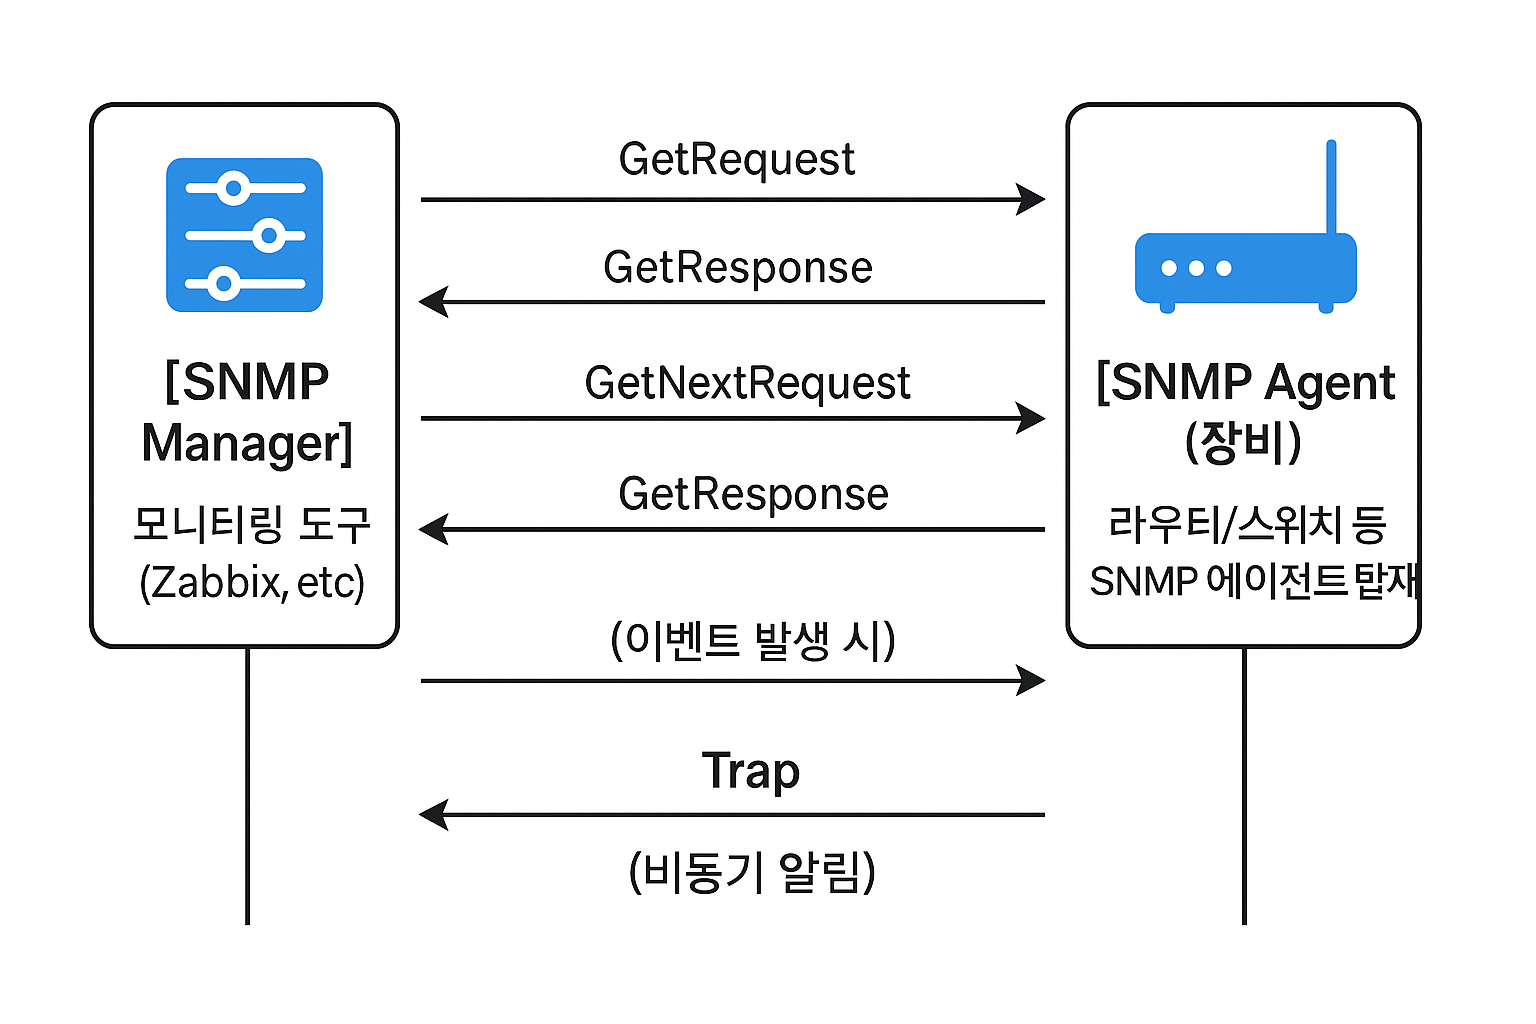

In [2]:
from IPython.display import Image

# 이미지 파일 경로 설정
image_path = 'SNMP_PDU.png'

# 이미지 출력
Image(filename=image_path)

### ✅ SNMP ↔ JPA 엔티티 비유 정리

| SNMP 메시지 종류 | 비유 (JPA 기준) | 설명 |
| --- | --- | --- |
| **GetRequest** | `entity.getName()` | SNMP 매니저가 에이전트(MIB)에게 값을 요청하는 것 = getter로 값 읽기 |
| **SetRequest** | `entity.setName("X")` | SNMP 매니저가 값을 설정하는 것 = setter로 값 쓰기 |
| **GetResponse** | return `"value"` | getter 실행 결과 |
| **SetResponse** | return `"OK"` or 반영 확인 | setter 반영 결과 전달 |
| **GetNextRequest** | `다음 필드로 이동` | 엔티티 내부 순회 또는 `Iterator.next()` 같은 느낌 |
| **Trap** | `@EntityListener` + 이벤트 발생 → 알림 | 에이전트가 알아서 매니저에게 비동기 알림 (예: 장애 발생 시 Trap 발송) |

---

### 🧠 비유 정리 예문

> SNMP는 결국
>
>
> **MIB = JPA 엔티티**
>
> **GetRequest = getter 호출**
>
> **SetRequest = setter 호출**
>
> 으로 보면 편하다.
>

---

## 📘 SNMP ↔ Spring/JPA 실무 감각 매핑표

| SNMP 개념 | Spring / JPA 개념 | 설명 |
| --- | --- | --- |
| **SNMP Manager** | REST Client / Service | 외부에서 값을 요청하거나 설정하는 주체 |
| **SNMP Agent** | @RestController / @Service | 데이터를 제공하거나 응답하는 대상 |
| **MIB (Management Information Base)** | Entity 클래스 (도메인 모델) | 관리 객체(OID) 정의 → JPA에서 `@Entity` |
| **OID (Object Identifier)** | 필드 이름 (`user.name`) | JPA 필드명처럼 트리 구조 식별자 |
| **GetRequest** | `getter()` 호출 or `GET /api/data` | 읽기 요청 (`@GetMapping`, `getName()`) |
| **SetRequest** | `setter()` 호출 or `PUT /api/data` | 쓰기 요청 (`@PutMapping`, `setName("X")`) |
| **GetResponse / SetResponse** | JSON 반환 / 200 OK | 요청 처리 결과 |
| **GetNextRequest** | MIB 순회 → List 조회 | `findAll()`, `@OneToMany` 순회와 비슷 |
| **Trap** | Event → Listener | Agent가 비동기로 상태를 알리는 것 (ex. `ApplicationEventPublisher`) |
| **Community String** | 토큰 or 비밀키 | SNMP v1/v2c의 인증 수단 → 실무에선 API key 느낌 |
| **SNMPv3 인증** | Spring Security 인증/인가 | SNMPv3에서는 사용자 기반 인증과 암호화 지원 |

---

### 📌 비유 중심 요약

- **MIB = JPA Entity**
- **OID = Entity 필드명**
- **Manager = REST 클라이언트**
- **Agent = @Service or @Controller**
- **Trap = 비동기 이벤트 핸들러**

---

### ✅ 예제 흐름 비유

```java
// SNMP의 GetRequest(OID: 1.3.6.1.2.1.1.1)
GET /api/system/description

// SNMP의 SetRequest(OID: 1.3.6.1.2.1.1.5, Value: "MyRouter")
PUT /api/system/name
Body: { "name": "MyRouter" }

// JPA 내부 흐름
entity.setName("MyRouter");
repository.save(entity);

```

---

## ✅ SNMP 구조 모사: Spring Boot 예제

### 📁 구조 개요

```
src/
├── controller/
│   └── SystemInfoController.java
├── service/
│   └── SystemInfoService.java
├── model/
│   └── SystemInfo.java
```

---

### 📦 `model/SystemInfo.java`

```java
package com.example.model;

public class SystemInfo {
    private String description;
    private String name;

    public SystemInfo() {
        this.description = "Linux Device - SNMP Agent";
        this.name = "Router01";
    }

    // Getter (GetRequest)
    public String getDescription() {
        return description;
    }

    public String getName() {
        return name;
    }

    // Setter (SetRequest)
    public void setDescription(String description) {
        this.description = description;
    }

    public void setName(String name) {
        this.name = name;
    }
}

```

---

### 🔧 `service/SystemInfoService.java`

```java
package com.example.service;

import com.example.model.SystemInfo;
import org.springframework.stereotype.Service;

@Service
public class SystemInfoService {
    private final SystemInfo systemInfo = new SystemInfo();

    public SystemInfo getSystemInfo() {
        return systemInfo;
    }

    public void updateName(String name) {
        systemInfo.setName(name);
    }

    public void updateDescription(String desc) {
        systemInfo.setDescription(desc);
    }
}

```

---

### 🌐 `controller/SystemInfoController.java`

```java
package com.example.controller;

import com.example.model.SystemInfo;
import com.example.service.SystemInfoService;
import org.springframework.web.bind.annotation.*;

@RestController
@RequestMapping("/snmp")
public class SystemInfoController {

    private final SystemInfoService service;

    public SystemInfoController(SystemInfoService service) {
        this.service = service;
    }

    // GetRequest (Read MIB object)
    @GetMapping("/system")
    public SystemInfo getInfo() {
        return service.getSystemInfo();
    }

    // SetRequest (Write MIB object)
    @PutMapping("/system/name")
    public void setName(@RequestBody String name) {
        service.updateName(name);
    }

    @PutMapping("/system/description")
    public void setDescription(@RequestBody String desc) {
        service.updateDescription(desc);
    }

    // Trap 예시 (비동기 이벤트 시뮬레이션)
    @PostMapping("/trap")
    public String receiveTrap(@RequestBody String trapMessage) {
        System.out.println("Trap received: " + trapMessage);
        return "Trap Acknowledged";
    }
}

```

---

## 🧠 SNMP 대응 매핑

| SNMP 용어 | 이 예제 코드 구성 |
| --- | --- |
| GetRequest | `GET /snmp/system` |
| SetRequest | `PUT /snmp/system/name`, `/description` |
| Trap | `POST /snmp/trap` (Agent → Manager 알림) |
| MIB 객체 | `SystemInfo` 클래스 내부 필드 |

---

## Q. SNMP는 UDP 어쩌구인데 왜 응용 계층이죠? 헷갈리네요..

정말 좋은 질문입니다. 많은 분들이 **"UDP인데 왜 응용 계층이야?"** 하고 혼란을 느끼는 대표적인 예가 바로 **SNMP**입니다. 헷갈리는 이유는 **OSI 7계층과 TCP/IP 계층 혼용**, 그리고 **UDP의 "전송 계층" 이미지** 때문입니다.

---

## ✅ 결론 먼저:

> SNMP는 응용 계층 프로토콜입니다. UDP는 단지 그 아래 전송 계층에서 동작할 뿐입니다.
>

---

## 🔍 계층 관점에서 정리

| 계층 | 프로토콜 예시 |
| --- | --- |
| **7계층: 응용 계층** | SNMP, HTTP, FTP, SMTP, DNS |
| 4계층: 전송 계층 | TCP, UDP |
| 3계층: 네트워크 계층 | IP |
| 2계층: 데이터링크 계층 | Ethernet |
| 1계층: 물리 계층 | 케이블 등 |

➡ SNMP는 응용 계층에서 작동하면서, **전송 계층으로 UDP를 사용**합니다.

---

## 📦 구조 예시

```
[응용 계층]     SNMP
[전송 계층]     UDP (161/162번 포트 사용)
[네트워크 계층] IP
[데이터링크 계층] Ethernet
```

---

## ⚠️ 헷갈리는 포인트 정리

| 혼동 이유 | 설명 |
| --- | --- |
| ❌ "UDP = 하위 계층이니 상위는 전송계층인가?" | ↪ 전혀 아님. UDP는 단지 "배송 수단"일 뿐 |
| ❌ "UDP 쓰면 로우레벨인가?" | ↪ UDP든 TCP든 **상위 응용 계층은 따로 있음** |
| ✅ "SNMP는 데이터를 정의하고 해석하는 응용 규약" | ↪ 그래서 **MIB/OID 같은 정보 처리**를 담당하는 응용계층 프로토콜 |

---

## 📚 쉬운 비유

> SNMP는 “소포에 들어있는 편지 내용”이고
>
>
> UDP는 “소포를 전달하는 택배 수단”입니다.
>
- **편지 내용** = SNMP 메시지 (`GetRequest`, `Trap` 등)
- **택배 수단** = UDP (빠르지만 도착 여부는 책임지지 않음)

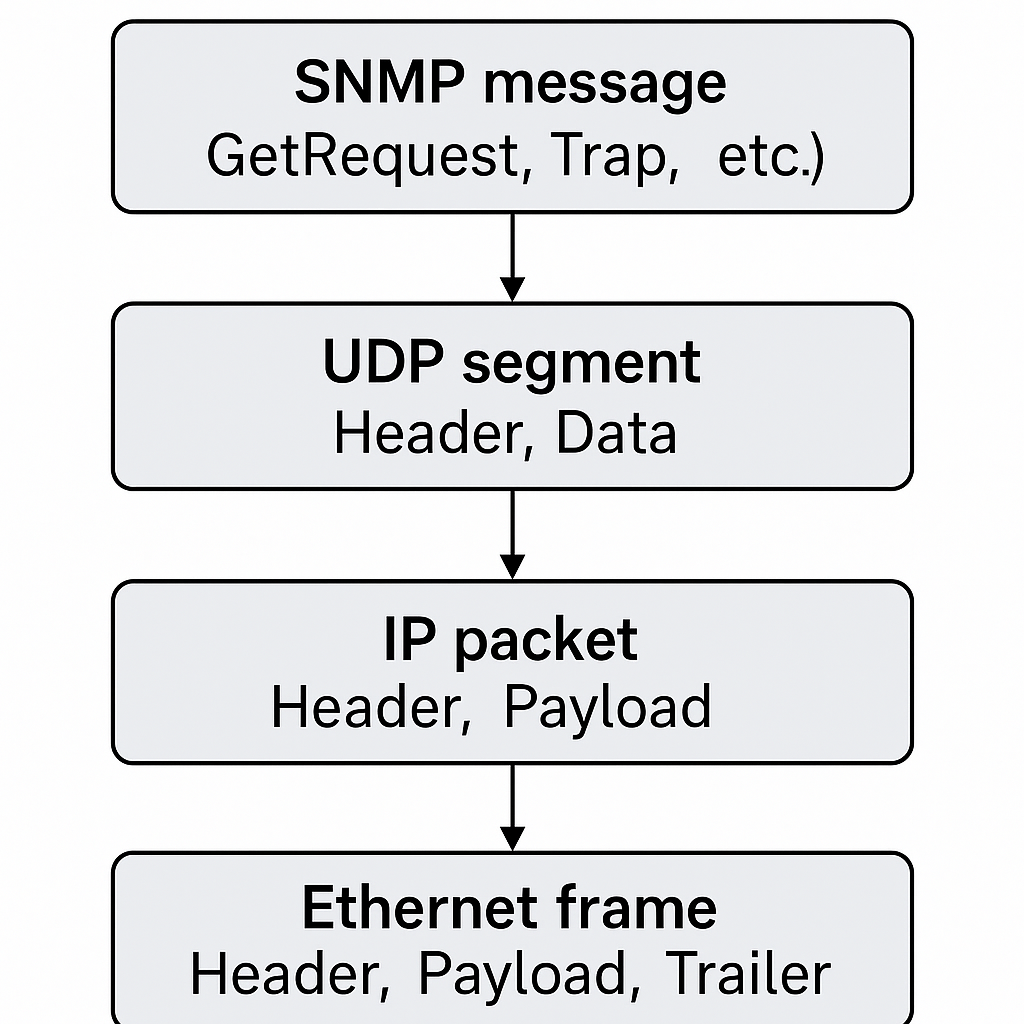

In [3]:
from IPython.display import Image

# 이미지 파일 경로 설정
image_path = 'SNMP_packet.png'

# 이미지 출력
Image(filename=image_path)